In [1]:
from tensorly.kruskal import kruskal_to_tensor
from tensortools import cp_als, cp_rand
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# params
N = 400
ndim = 3
R = 20

# generate data
true_factors = [np.random.randn(N, R) for _ in range(ndim)]
data = kruskal_to_tensor(true_factors)

In [7]:
fit_kwargs = {"init_factors" : [np.random.randn(N, R) for _ in range(ndim)],
              "verbose" : True,
              "print_every" : 5 }

In [8]:
# run fits
print('CP-ALS\n'+'-'*30)
als_factors, als_info = cp_als(data, R, **fit_kwargs)
print('CP-RAND\n'+'-'*30)
rand_factors, rand_info = cp_rand(data, R, **fit_kwargs)

CP-ALS
------------------------------
iter=0, error=1.4039139373711191
iter=5, error=0.22407821131092057, variation=0.006819325495357853
iter=10, error=3.8709333254075994e-07, variation=1.8827929585164396e-05
converged in 11 iterations.
CP-RAND
------------------------------
iter=0, error=1.2882688115193015
iter=5, error=0.3538292373817759, variation=0.2210897705347566
iter=10, error=0.008680644034149938, variation=0.028493697506309566
iter=15, error=5.924220028574644e-06, variation=1.9116959007761124e-05
converged in 18 iterations.


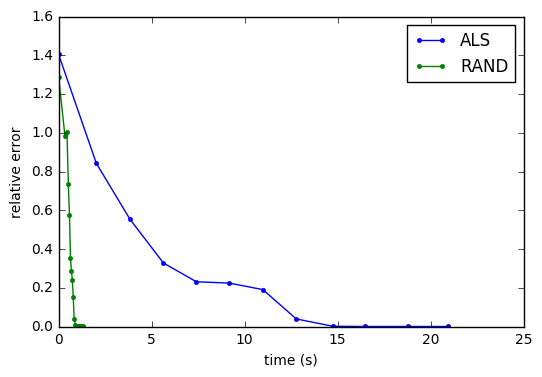

In [9]:
plt.figure()
plt.plot(als_info['t_elapsed'], als_info['rec_errors'], '.-', label='ALS')
plt.plot(rand_info['t_elapsed'], rand_info['rec_errors'], '.-', label='RAND')
plt.legend(loc='best')
plt.ylabel('relative error')
plt.xlabel('time (s)')